In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Rathn\Documents\MTH Project3\Crime Incidents.csv")

C:\Users\Rathn\AppData\Local\Temp\ipykernel_27620\1105427635.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Rathn\Documents\MTH Project3\Crime Incidents.csv")


In [3]:
df.head(5)
df = df.dropna(subset=['STREETNAME', 'XSTREETNAME'])

In [4]:
top_states = df['STREETNAME'].value_counts().head(10)

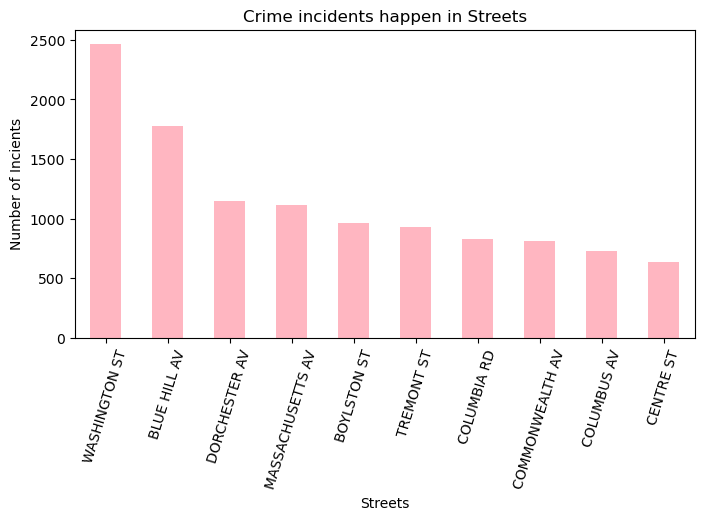

In [5]:
# Plotting the top affected states
plt.figure(figsize=(8, 4))
top_states.plot(kind='bar', color='lightpink')
plt.title('Crime incidents happen in Streets')
plt.xlabel('Streets')
plt.ylabel('Number of Incients')
plt.xticks(rotation=73)
plt.show()

C:\Users\Rathn\AppData\Local\Temp\ipykernel_27620\1737541660.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(file_path, parse_dates=['FROMDATE'], infer_datetime_format=True)


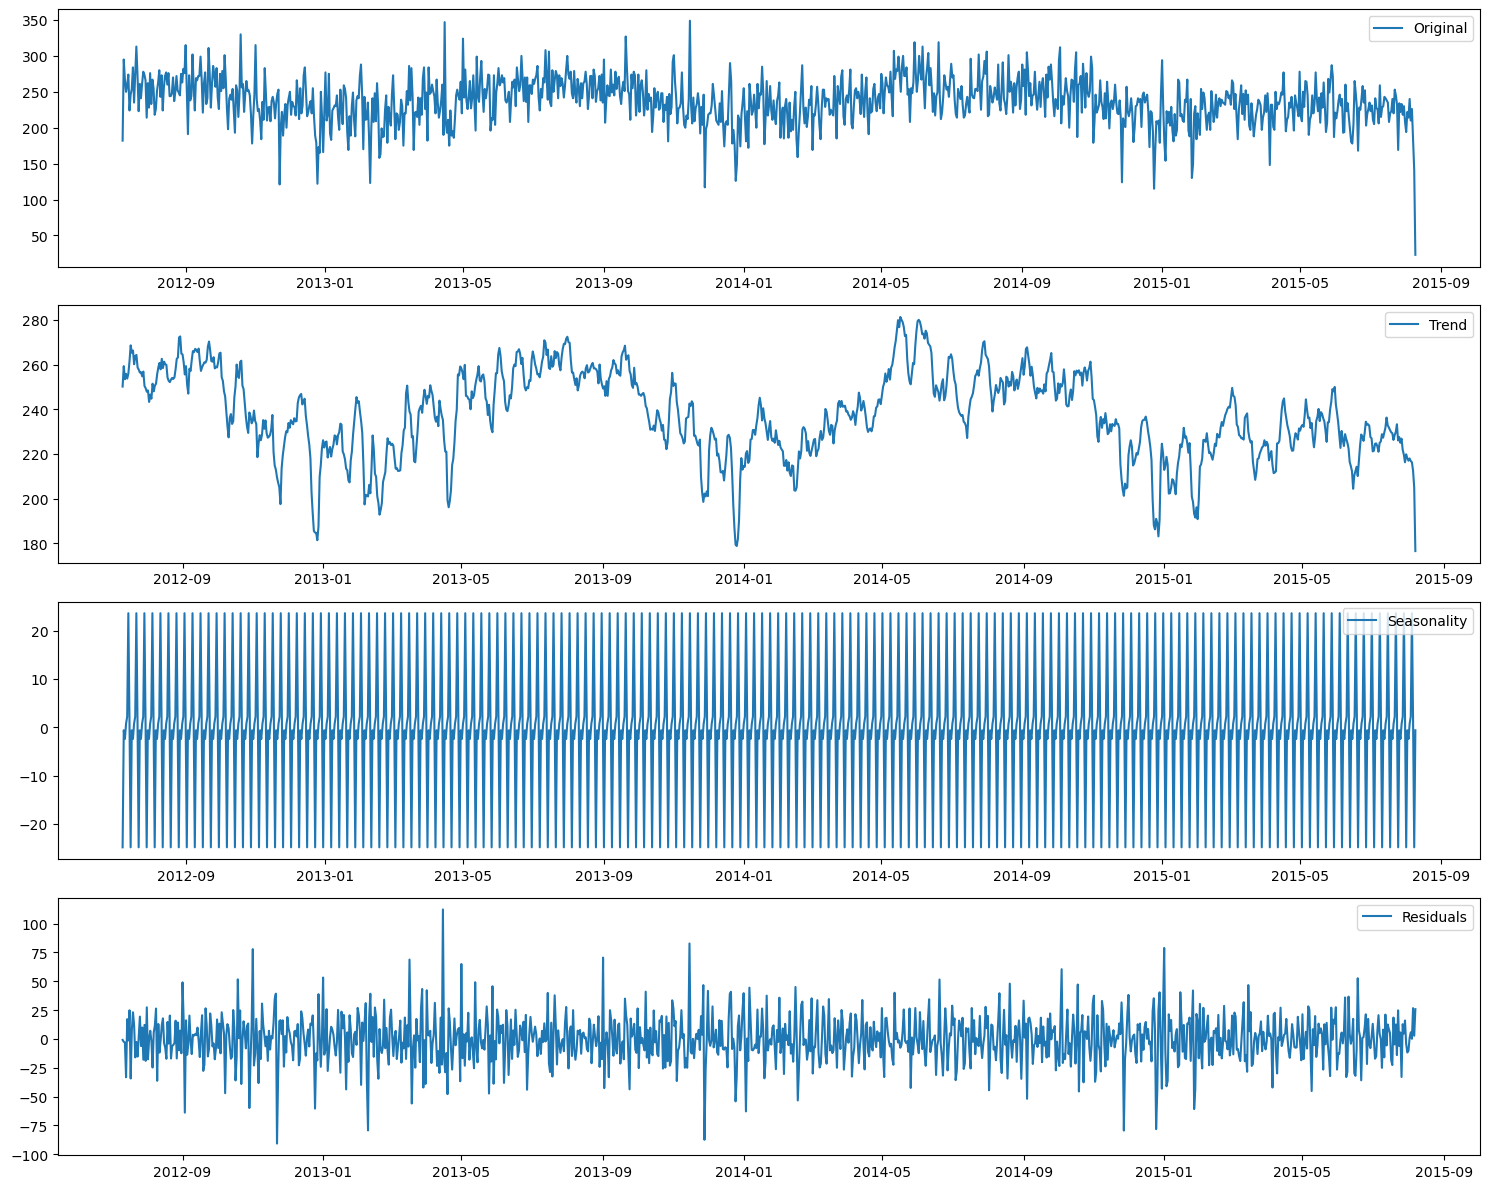

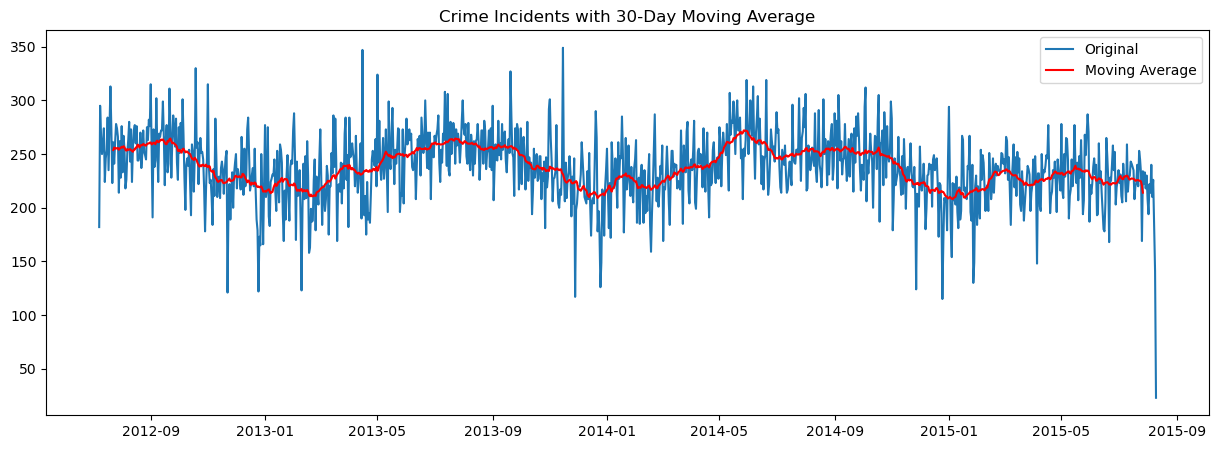

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = r"C:\Users\Rathn\Documents\MTH Project3\Crime Incidents.csv"
crime_data = pd.read_csv(file_path, parse_dates=['FROMDATE'], infer_datetime_format=True)

# Create a time series of incident counts per day
crime_data.set_index('FROMDATE', inplace=True)
time_series_data = crime_data.resample('D').size()

# Decompose the time series
decomposition = seasonal_decompose(time_series_data, model='additive')

# Retrieve the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Apply a simple moving average
window = 30  # days
moving_avg = time_series_data.rolling(window=window, center=True).mean()

# Plotting
plt.figure(figsize=(15, 12))

plt.subplot(411)
plt.plot(time_series_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Plotting moving average
plt.figure(figsize=(15, 5))
plt.plot(time_series_data, label='Original')
plt.plot(moving_avg, color='red', label='Moving Average')
plt.legend(loc='best')
plt.title('Crime Incidents with 30-Day Moving Average')
plt.show()

C:\Users\Rathn\AppData\Local\Temp\ipykernel_27620\1455272530.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(file_path)


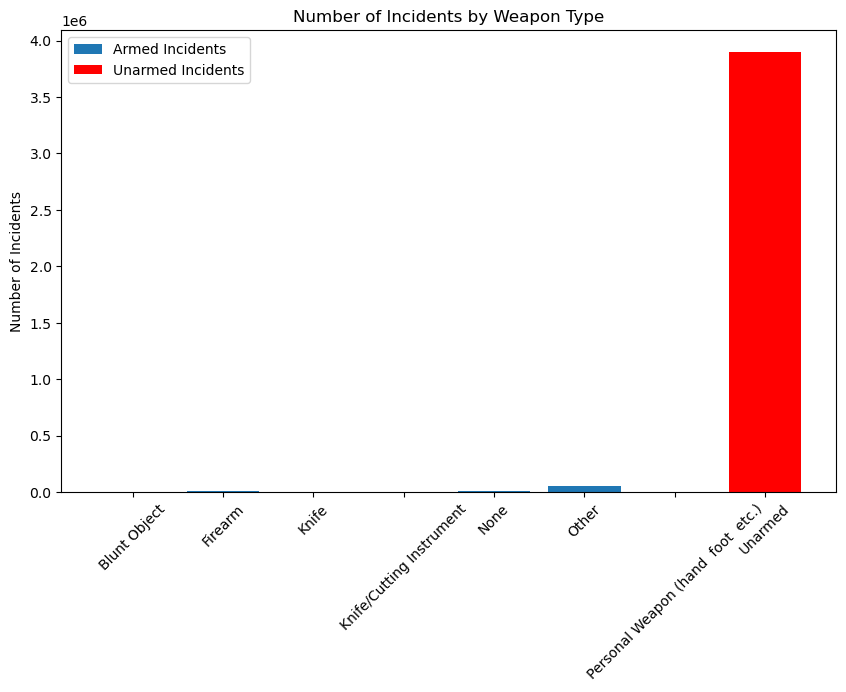

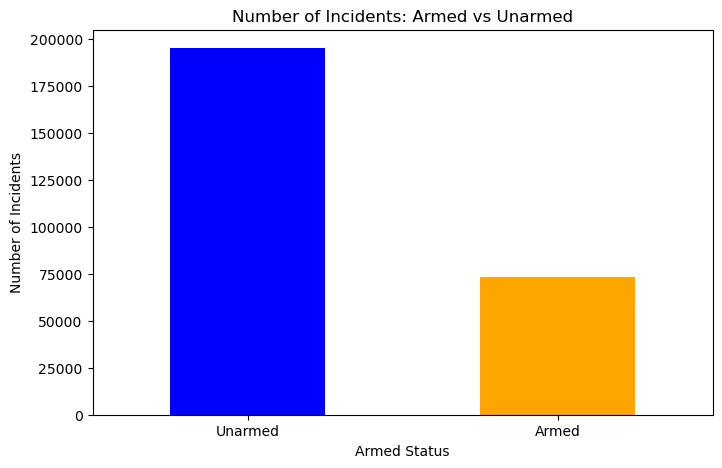

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
crime_data = pd.read_csv(file_path)

# Graph 1: Categorizing data based on 'WEAPONTYPE'
armed_incidents = crime_data[crime_data['WEAPONTYPE'] != 'Unarmed'].groupby('WEAPONTYPE').size()
unarmed_incidents = crime_data[crime_data['WEAPONTYPE'] == 'Unarmed'].size

# Plotting Graph 1
plt.figure(figsize=(10, 6))
plt.bar(armed_incidents.index, armed_incidents.values, label='Armed Incidents')
plt.bar('Unarmed', unarmed_incidents, color='r', label='Unarmed Incidents')
plt.xticks(rotation=45)
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Weapon Type')
plt.legend()
plt.show()

# Graph 2: Simplified categorization into 'Armed' and 'Unarmed'
crime_data['Armed_Status'] = crime_data['WEAPONTYPE'].apply(lambda x: 'Unarmed' if x == 'Unarmed' else 'Armed')
incident_counts = crime_data['Armed_Status'].value_counts()

# Plotting Graph 2
plt.figure(figsize=(8, 5))
incident_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Armed Status')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents: Armed vs Unarmed')
plt.xticks(rotation=0)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import datetime as dt

# Preprocess the data
# Convert 'FROMDATE' to datetime
crime_data['FROMDATE'] = pd.to_datetime(crime_data['FROMDATE'], errors='coerce')

# Extracting time features
crime_data['Hour'] = crime_data['FROMDATE'].dt.hour
crime_data['DayOfWeek'] = crime_data['FROMDATE'].dt.dayofweek # Monday=0, Sunday=6

# Dropping rows where time is NaN (as time is crucial for our analysis)
crime_data = crime_data.dropna(subset=['FROMDATE'])

# Encode categorical variables
le = LabelEncoder()
crime_data['INCIDENT_TYPE_DESCRIPTION'] = le.fit_transform(crime_data['INCIDENT_TYPE_DESCRIPTION'].astype(str))

# Selecting relevant columns for the model
features = ['Hour', 'DayOfWeek', 'Month', 'Year']
target = 'INCIDENT_TYPE_DESCRIPTION'

# Handling missing values - filling with median for simplicity
crime_data[features] = crime_data[features].fillna(crime_data[features].median())

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(crime_data[features], crime_data[target], test_size=0.3, random_state=42)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)

report



C:\Users\Rathn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rathn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rathn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       201\n           1       0.13      0.05      0.07       292\n           2       0.07      0.02      0.03      1713\n           3       0.00      0.00      0.00         6\n           4       0.03      0.01      0.01      1376\n           5       0.00      0.00      0.00       100\n           6       0.00      0.00      0.00         6\n           7       0.00      0.00      0.00       862\n           8       0.02      0.00      0.00       591\n          10       0.00      0.00      0.00        10\n          11       0.00      0.00      0.00        64\n          12       0.00      0.00      0.00        11\n          13       0.00      0.00      0.00       398\n          14       0.00      0.00      0.00       264\n          15       0.00      0.00      0.00        12\n          17       0.00      0.00      0.00        42\n          19       0.00      0.00      0.00        17\n       

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Extracting latitude and longitude from the 'Location' column
# The format of the location is assumed to be (latitude, longitude)
df[['Latitude', 'Longitude']] = df['Location'].str.extract(r'\(([^,]+), ([^\)]+)\)')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Dropping rows with missing values in these new columns
data_clean = df.dropna(subset=['Latitude', 'Longitude'])

# Aggregating data by location to calculate crime count per location
crime_count_per_location = data_clean.groupby(['Latitude', 'Longitude']).size().reset_index(name='CrimeCount')

# Preparing data for regression analysis
X = crime_count_per_location[['Latitude', 'Longitude']]
y = crime_count_per_location['CrimeCount']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Checking the model's score
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

(train_score, test_score)

(0.9453126936280424, -0.01641580415670174)

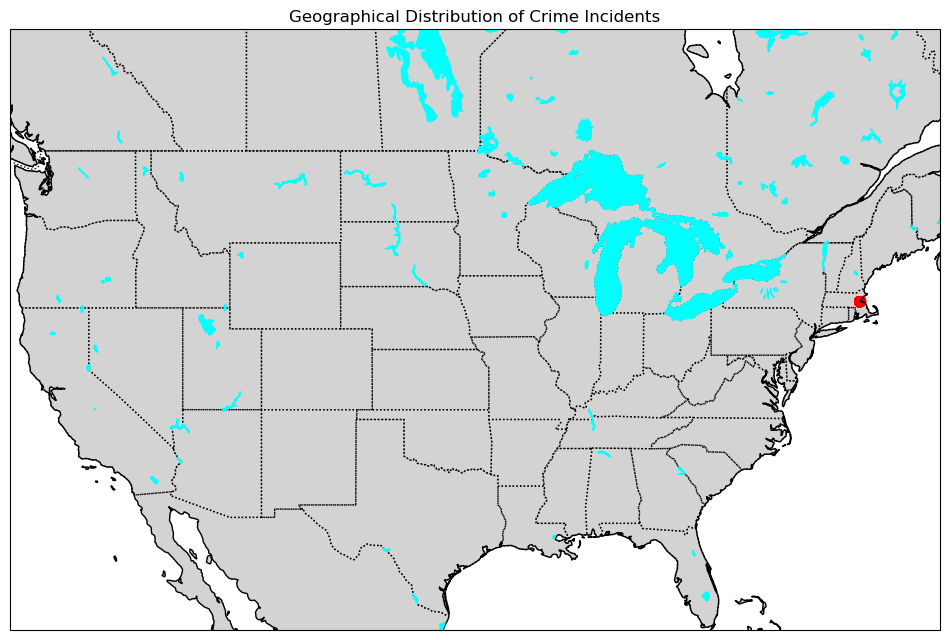

In [13]:
# Create a map
fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': ccrs.Mercator()})
ax.set_extent([-125, -66, 25, 50])

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.LAKES, edgecolor='aqua', facecolor='aqua')

# Plot each point
scatter = ax.scatter(df['Longitude'].values, df['Latitude'].values, s=25, color='red', marker='o', alpha=0.5, transform=ccrs.PlateCarree())

plt.title('Geographical Distribution of Crime Incidents')
plt.show()

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [16]:
# Aggregating the data to get the total number of crimes per year
yearly_crime_counts = crime_data['Year'].value_counts().sort_index()

In [17]:
# Creating a DataFrame for linear regression
df = pd.DataFrame({
    'Year': yearly_crime_counts.index,
    'Total_Crimes': yearly_crime_counts.values
})


In [18]:
# Preparing the data for linear regression
X = df['Year'].values.reshape(-1, 1)  # Features (year)
y = df['Total_Crimes'].values         # Target (total number of crimes)


In [19]:
# Creating a linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [20]:
# Predicting the total number of crimes for the years in the dataset
predictions = model.predict(X)


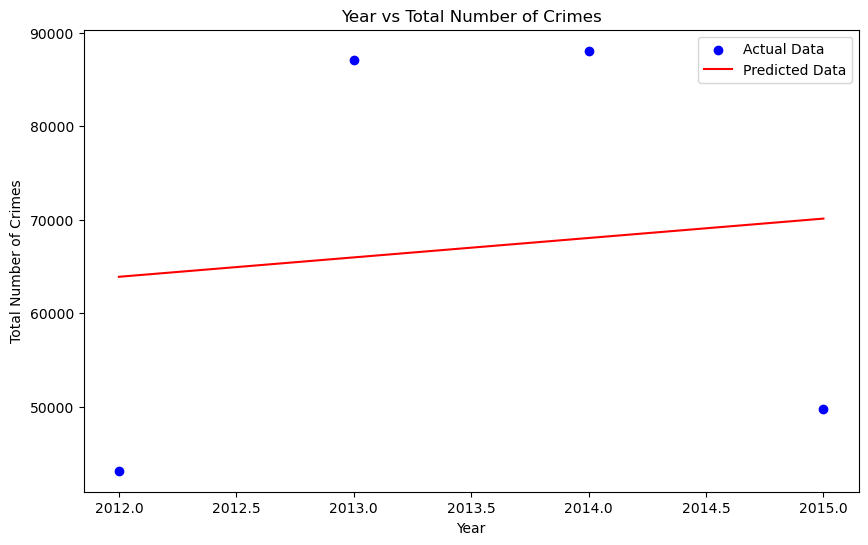

In [21]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', label='Predicted Data')
plt.title('Year vs Total Number of Crimes')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.legend()
plt.show()


In [30]:
# Model coefficients
intercept = model.intercept_
slope = model.coef_[0]

intercept, slope


SyntaxError: invalid non-printable character U+00A0 (997034528.py, line 5)

In [29]:
intercept, slope

SyntaxError: invalid non-printable character U+00A0 (4090053591.py, line 1)